#Analytics 512 Homework 7

8.4 #4 (4), #5 (3)
8.4 #8a-c (8), #12 (10)

##Exericse 8.4 #5

In [27]:
greenred = c(0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, 0.75)
gr.mean = mean(greenred)
greenred[greenred>=gr.mean] = "red"
greenred[greenred<gr.mean] = "green"
greenred

[1] "green" "green" "green" "green" "red"   "red"   "red"   "red"   "red"  
[10] "red"

##Exericse 8.4 #8

###Part A

In [4]:
library(ISLR)
library(tree)
attach(Carseats)

The following objects are masked from Carseats (pos = 4):

    Advertising, Age, CompPrice, Education, Income, Population, Price,
    Sales, ShelveLoc, Urban, US



In [5]:
training = sample(nrow(Carseats), 0.7*nrow(Carseats))
train = Carseats[training,]
test = Carseats[-training,]

###Part B

In [6]:
tree.carseats = tree(Sales~. ,train)
summary(tree.carseats)


Regression tree:
tree(formula = Sales ~ ., data = train)
Variables actually used in tree construction:
[1] "ShelveLoc" "Price"     "Age"       "CompPrice" "Income"    "Education"
Number of terminal nodes:  16 
Residual mean deviance:  2.277 = 601.2 / 264 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-4.33100 -0.94050  0.04923  0.00000  1.04800  4.14900 

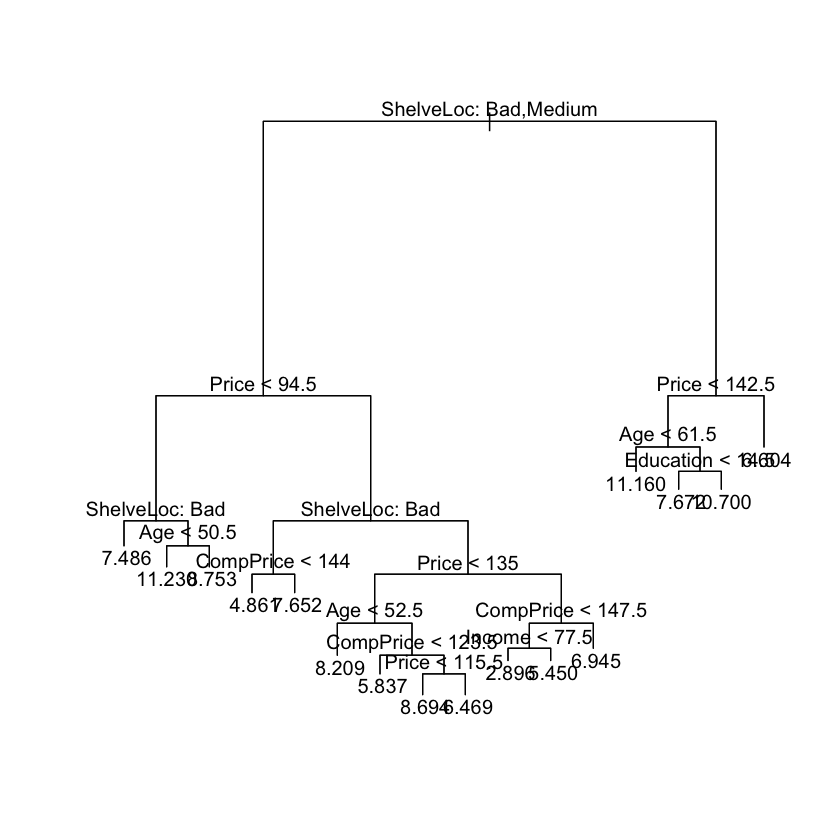

In [8]:
plot(tree.carseats)
text(tree.carseats ,pretty =0)

In [9]:
train.fit=predict(tree.carseats,train)
mean( (train.fit-train$Sales)^2 )

[1] 2.147169

In [12]:
test.pred=predict(tree.carseats,test)
mean( (test.pred-test$Sales)^2 )

[1] 6.205797

###Part C

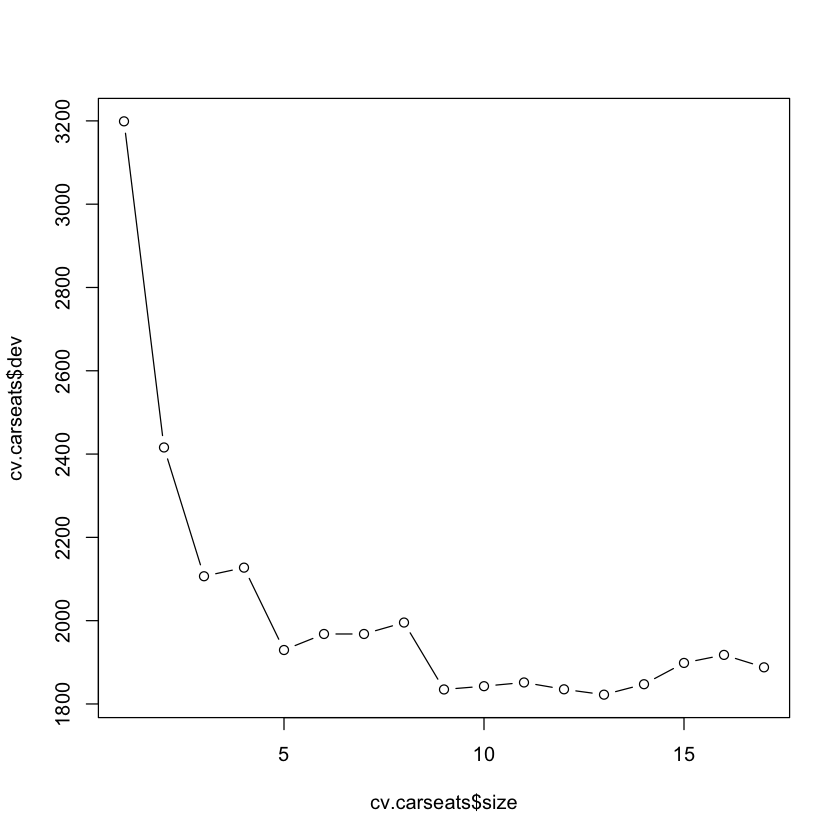

In [17]:
cv.carseats = cv.tree(tree(Sales~.,Carseats))
plot(cv.carseats$size ,cv.carseats$dev ,type='b')

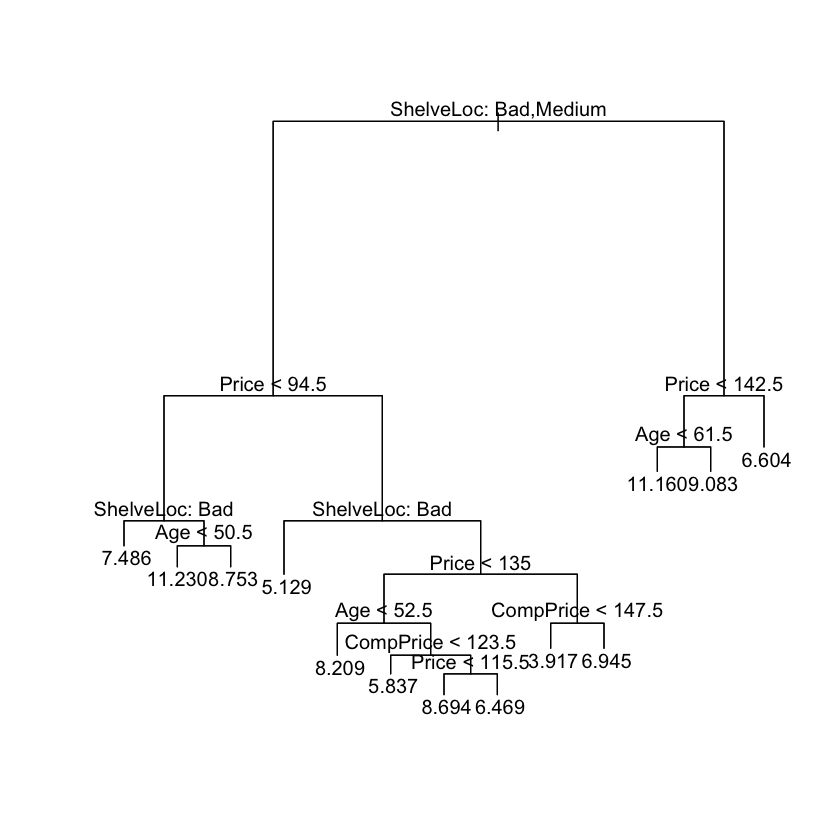

In [22]:
prune.carseats=prune.tree(tree.carseats ,best=cv.carseats$size[which.min(cv.carseats$dev)])
plot(prune.carseats)
text(prune.carseats ,pretty=0)

In [25]:
prune.pred = predict(prune.carseats, test)
mean( (prune.pred-test$Sales)^2 )

[1] 5.350707

##Exercise 8.4 #12